In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

In [2]:
resaleflat1 = pd.read_csv('/content/y2015_to_2017_buffer_1500.csv')
#resaleflat2 = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
resaleflat2 = pd.read_csv('/content/y2015_to_2017_buffer_750.csv')


#resaleflat1 = resaleflat.copy()
resaleflatview = resaleflat1.copy()

locations = pd.read_csv('street_to_MRT.csv')
locations = locations.drop('Unnamed: 0', axis=1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
locations = locations[-locations.duplicated(keep='first',subset='street_name')]

In [0]:
resaleflat1 = pd.merge(resaleflat1,locations,how='left')

In [5]:
resaleflat1.isnull().sum()

#Remaining lease has a lot of null, need to fix

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
remaining_lease             0
resale_price                0
price_per_sqm            2158
age_month                2158
remaining_lease_month    2158
postal                   2163
address                  2158
geometry                 2158
mallCount                2158
busInterchangeCount      2158
sportsCount              2158
hawkerCount              2158
npParkCount              2158
preschoolCount           2158
primarySchCount          2158
secondarySchCount        2158
tertiarySchCount         2158
dist_nearestMRT          2158
transaction_year            0
transaction_month           0
dtype: int64

In [6]:
resaleflat1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,price_per_sqm,age_month,remaining_lease_month,postal,address,geometry,mallCount,busInterchangeCount,sportsCount,hawkerCount,npParkCount,preschoolCount,primarySchCount,secondarySchCount,tertiarySchCount,dist_nearestMRT,transaction_year,transaction_month
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0,4250.00,348.0,840.0,560174.0,174 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,"c(28478.5837591651, 39676.8076486272)",3.0,2.0,1.0,1.0,2.0,37.0,3.0,5.0,2.0,1.697526,2015,1
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0,4044.12,408.0,780.0,560541.0,541 ANG MO KIO AVENUE 10 CHENG SAN GREEN SINGA...,"c(30482.0297685288, 39546.8847489604)",3.0,1.0,2.0,2.0,0.0,31.0,3.0,2.0,1.0,0.497407,2015,1
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,4130.43,420.0,768.0,560163.0,163 ANG MO KIO AVENUE 4 HDB-ANG MO KIO SINGAPO...,"c(28540.62696974, 39505.5349642498)",3.0,2.0,1.0,1.0,2.0,38.0,3.0,6.0,2.0,1.697526,2015,1
3,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0,4130.43,430.0,756.0,560163.0,163 ANG MO KIO AVENUE 4 HDB-ANG MO KIO SINGAPO...,"c(28540.62696974, 39505.5349642498)",3.0,2.0,1.0,1.0,2.0,38.0,3.0,6.0,2.0,1.697526,2015,1
4,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0,4264.71,432.0,756.0,560446.0,446 ANG MO KIO AVENUE 10 CHONG BOON CENTRE SIN...,"c(30452.6226920099, 38865.5836335386)",3.0,1.0,3.0,3.0,0.0,30.0,4.0,3.0,0.0,0.497407,2015,1


In [4]:
#resaleflat1 = pd.read_csv('/content/y2015_to_2017_buffer_1500.csv')
resaleflat1 = pd.read_csv('/content/y2015_to_2017_buffer_750.csv')

# drop rows with any null value
resaleflat1.dropna(inplace = True)

# drop columns:
# remaining_lease: 
resaleflat1.drop([
    'geometry', # for processing only
    'remaining_lease', # duplicate of remaining_lease_month
    'street_name', # random
    'address',  # random
    'block', # random
    'floor_area_sqm', # feature used to create target
    'age_month', # highly correlated to remaining_lease_month
    'lease_commence_date', # var used to create remaining_lease_month
    'transaction_month', # limited use
    'resale_price', # highly correlated to target
    'month' # duplicate of transaction_date
], axis=1, inplace=True)

# log price_per_sqm
#resaleflat1['price_per_sqm'] = resaleflat1['price_per_sqm'].apply(lambda x: np.log(1 + x))

# cut postal code to only be first 3 digits
resaleflat1['postal'] = resaleflat1['postal'].apply(lambda x: int(str(x)[:3]))

# change storey_range to average of floors, to change categorical to numerical
resaleflat1['storey_range'] = resaleflat1['storey_range'].apply(lambda x: (int(x[:2]) + int(x[-2:]))/2)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
resaleflat1.storey_range.unique()

array([ 8.,  2., 14., 11.,  5., 20., 17., 23., 26., 29., 35., 47., 32.,
       38., 44., 41., 50.])

In [6]:
resaleflat1.head()

,town,flat_type,storey_range,flat_model,transaction_year,price_per_sqm,remaining_lease_month,postal,mallCount,busInterchangeCount,sportsCount,hawkerCount,npParkCount,preschoolCount,primarySchCount,secondarySchCount,tertiarySchCount,dist_nearestMRT
0,ANG MO KIO,3 ROOM,8.0,Improved,2015,4250.00,840.0,560,0.0,0.0,0.0,0.0,2.0,12.0,2.0,1.0,1.0,1.697526
1,ANG MO KIO,3 ROOM,2.0,New Generation,2015,4044.12,780.0,560,0.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,0.0,0.497407
2,ANG MO KIO,3 ROOM,2.0,New Generation,2015,4130.43,768.0,560,0.0,0.0,0.0,0.0,2.0,11.0,2.0,2.0,1.0,1.697526
3,ANG MO KIO,3 ROOM,2.0,New Generation,2015,4130.43,756.0,560,0.0,0.0,0.0,0.0,2.0,11.0,2.0,2.0,1.0,1.697526
4,ANG MO KIO,3 ROOM,2.0,New Generation,2015,4264.71,756.0,560,0.0,0.0,0.0,0.0,0.0,11.0,2.0,1.0,0.0,0.497407


**One-Hot Encoding**

In [8]:
resaleflat1.head()

,town,flat_type,storey_range,flat_model,transaction_year,price_per_sqm,remaining_lease_month,postal,mallCount,busInterchangeCount,sportsCount,hawkerCount,npParkCount,preschoolCount,primarySchCount,secondarySchCount,tertiarySchCount,dist_nearestMRT
0,ANG MO KIO,3 ROOM,2,Improved,2015,4250.00,840.0,560,0.0,0.0,0.0,0.0,2.0,12.0,2.0,1.0,1.0,1.697526
1,ANG MO KIO,3 ROOM,0,New Generation,2015,4044.12,780.0,560,0.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,0.0,0.497407
2,ANG MO KIO,3 ROOM,0,New Generation,2015,4130.43,768.0,560,0.0,0.0,0.0,0.0,2.0,11.0,2.0,2.0,1.0,1.697526
3,ANG MO KIO,3 ROOM,0,New Generation,2015,4130.43,756.0,560,0.0,0.0,0.0,0.0,2.0,11.0,2.0,2.0,1.0,1.697526
4,ANG MO KIO,3 ROOM,0,New Generation,2015,4264.71,756.0,560,0.0,0.0,0.0,0.0,0.0,11.0,2.0,1.0,0.0,0.497407


In [0]:
categorical_vars = [['town', 'town'], ['flat_type', 'ft'], ['flat_model', 'fm'], ['storey_range', 'sr']]

for cat in categorical_vars:
    resaleflat1[cat[0]] = pd.Categorical(resaleflat1[cat[0]])
    catDummies = pd.get_dummies(resaleflat1[cat[0]], prefix = cat[1])
    resaleflat1 = pd.concat([resaleflat1, catDummies], axis=1)
    resaleflat1.drop(cat[0], axis=1, inplace=True)

In [10]:
resaleflat1.head()

,transaction_year,price_per_sqm,remaining_lease_month,postal,mallCount,busInterchangeCount,sportsCount,hawkerCount,npParkCount,preschoolCount,primarySchCount,secondarySchCount,tertiarySchCount,dist_nearestMRT,town_ANG MO KIO,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_BUKIT PANJANG,town_BUKIT TIMAH,town_CENTRAL AREA,town_CHOA CHU KANG,town_CLEMENTI,town_GEYLANG,town_HOUGANG,town_JURONG EAST,town_JURONG WEST,town_KALLANG/WHAMPOA,town_MARINE PARADE,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,...,ft_5 ROOM,ft_EXECUTIVE,ft_MULTI-GENERATION,fm_2-room,fm_Adjoined flat,fm_Apartment,fm_DBSS,fm_Improved,fm_Improved-Maisonette,fm_Maisonette,fm_Model A,fm_Model A-Maisonette,fm_Model A2,fm_Multi Generation,fm_New Generation,fm_Premium Apartment,fm_Premium Apartment Loft,fm_Premium Maisonette,fm_Simplified,fm_Standard,fm_Terrace,fm_Type S1,fm_Type S2,sr_0,sr_1,sr_2,sr_3,sr_4,sr_5,sr_6,sr_7,sr_8,sr_9,sr_10,sr_11,sr_12,sr_13,sr_14,sr_15,sr_16
0,2015,4250.00,840.0,560,0.0,0.0,0.0,0.0,2.0,12.0,2.0,1.0,1.0,1.697526,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,4044.12,780.0,560,0.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,0.0,0.497407,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015,4130.43,768.0,560,0.0,0.0,0.0,0.0,2.0,11.0,2.0,2.0,1.0,1.697526,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015,4130.43,756.0,560,0.0,0.0,0.0,0.0,2.0,11.0,2.0,2.0,1.0,1.697526,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015,4264.71,756.0,560,0.0,0.0,0.0,0.0,0.0,11.0,2.0,1.0,0.0,0.497407,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#resaleflat1.to_csv('/content/processed_data.csv')

In [12]:
resaleflat1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106767 entries, 0 to 108929
Data columns (total 84 columns):
transaction_year             106767 non-null int64
price_per_sqm                106767 non-null float64
remaining_lease_month        106767 non-null float64
postal                       106767 non-null int64
mallCount                    106767 non-null float64
busInterchangeCount          106767 non-null float64
sportsCount                  106767 non-null float64
hawkerCount                  106767 non-null float64
npParkCount                  106767 non-null float64
preschoolCount               106767 non-null float64
primarySchCount              106767 non-null float64
secondarySchCount            106767 non-null float64
tertiarySchCount             106767 non-null float64
dist_nearestMRT              106767 non-null float64
town_ANG MO KIO              106767 non-null uint8
town_BEDOK                   106767 non-null uint8
town_BISHAN                  106767 non-null uint

In [0]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [14]:
#Seperate datasets

X = resaleflat1.drop('price_per_sqm', axis=1)
Y = resaleflat1['price_per_sqm']

print(X.shape)
print(Y.shape)

X.dtypes

(106767, 83)
(106767,)


transaction_year           int64
remaining_lease_month    float64
postal                     int64
mallCount                float64
busInterchangeCount      float64
                          ...   
sr_12                      uint8
sr_13                      uint8
sr_14                      uint8
sr_15                      uint8
sr_16                      uint8
Length: 83, dtype: object

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Neural Network**

In [0]:
MLP_NN = MLPRegressor(hidden_layer_sizes=(40,40,40), max_iter=1500, alpha=1e-6, random_state=42)

MLP_NN.fit(x_train,y_train)
pred_MLP_NN = MLP_NN.predict(x_test)

In [17]:
pred_MLP_NN

array([5905.0730071 , 4242.79661164, 3987.77640973, ..., 4311.80706692,
       4415.57688566, 4993.11208136])

In [18]:
y_test.head()

103167    4611.65
55895     3695.12
27851     4272.73
92728     3782.05
19817     4217.69
Name: price_per_sqm, dtype: float64

In [19]:
(y_test - pred_MLP_NN).head()

103167   -1293.423007
55895     -547.676612
27851      284.953590
92728     -621.472772
19817     -403.144571
Name: price_per_sqm, dtype: float64

In [20]:
#Let's see how our model performed

import math

math.sqrt(mean_squared_error(y_test, pred_MLP_NN, multioutput='uniform_average'))

358.85698833013123

In [21]:
#Find RMSE for baseline model - i.e. take average house price

base = math.sqrt(((y_test - y_test.mean()) ** 2).mean())

base

#RMSE of $138415 for prediction of house price using average

1141.9846154030777

In [22]:
MLP_NN_diff = math.sqrt(((y_test - pred_MLP_NN) ** 2).mean())
MLP_NN_diff

#RMSE of $51868 using linear regression
#RMSE of $32233 using random forest, 40 variables
#RMSE of $32233 using random forest, 40 variables, with MRT distance
#RMSE of $35801 using NN, layer 30,30, with MRT distance
#RMSE of $37981 using NN, layer 20,20 with MRT distance
#RMSE of $38650 using NN, layer 40,40 with MRT distance, no difference for iteration 800 and 1200
#RMSE of $33218 using NN, layer 30,30,30 with MRT distance
#RMSE of $32510 using NN, layer 30,30,30 with MRT distance

358.8569883301316

In [23]:
def RMSE(actual,predict):
    base = math.sqrt(((actual - actual.mean()) ** 2).mean())
    x = math.sqrt(((actual - predict) ** 2).mean())
    return x/base

RMSE(y_test, pred_MLP_NN)

#RMSE of 0.2328 using random forest, 40 variables
#RMSE of 0.1854 using random forest, 40 variables, with MRT
#RMSE of 0.2586 using NN, layer 30,30, with MRT distance
#RMSE of 0.2744 using NN, layer 20,20 with MRT distance
#RMSE of 0.2792 using NN, layer 40,40 with MRT distance, no difference for iteration 800 and 1200
#RMSE of 0.2399 using NN, layer 30,30,30 with MRT distance
#RMSE of 0.2348 using NN, layer 30,30,30 with MRT distance

0.3142397747656772

In [24]:

#Get R^2 of prediction in linear regression, 0.860
#Get R^2 for random forest, 0.790
#Get R^2 for random forest, 40 variables, 0.94577
#Get R^2 for random forest, 40 variables, MRT, 0.9656
#Get R^2 for neural network, (30,30) hidden layer, MRT, 0.9331
#Get R^2 for neural network, (20,20) hidden layer, MRT, 0.9247
#Get R^2 for neural network, (40,40) hidden layer, MRT, 0.9220, no difference for iteration 800 and 1200
#Get R^2 for neural network, (30,30,30) hidden layer, MRT, 0.9424
#Get R^2 for neural network, (40,40,40) hidden layer, MRT, 0.9448

MLP_NN.score(x_test,y_test)

0.9012533639552164

In [25]:
y_test.values

array([4611.65, 3695.12, 4272.73, ..., 3868.85, 4235.29, 4575.76])

In [26]:
pred_MLP_NN

array([5905.0730071 , 4242.79661164, 3987.77640973, ..., 4311.80706692,
       4415.57688566, 4993.11208136])

In [0]:
result1_df = pd.DataFrame({'actual': y_test.values.flatten(), 'predict': pred_MLP_NN.flatten(), 'difference':(y_test.values - pred_MLP_NN).flatten()})

In [28]:
result1_df

,actual,predict,difference
0,4611.65,5905.073007,-1293.423007
1,3695.12,4242.796612,-547.676612
2,4272.73,3987.776410,284.953590
3,3782.05,4403.522772,-621.472772
4,4217.69,4620.834571,-403.144571
...,...,...,...
21349,7808.99,7867.498032,-58.508032
21350,4047.62,3739.653499,307.966501
21351,3868.85,4311.807067,-442.957067
21352,4235.29,4415.576886,-180.286886


In [29]:
print(result1_df['difference'].mean())
print(result1_df['difference'].max())
print(result1_df['difference'].min())

-35.33298259555767
2455.3357212614283
-5534.455515061502


In [30]:
result1_df[result1_df['difference'] > 100000]

,actual,predict,difference


In [31]:
result1_df[result1_df['difference'] < -100000]

,actual,predict,difference


In [32]:
!pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.4-cp36-none-any.whl size=10086 sha256=86f25b4f79fd57f8e17e030dc14cb7f723acd9707e07994226f1d2802041d69c
  Stored in directory: /root/.cache/pip/wheels/c7/35/67/4065afd69df4c0be693ecdec8a9c1433a23f80ee60395272ba
Successfully built rfpimp


In [33]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(MLP_NN, x_train, y_train):
    return r2_score(y_train, MLP_NN.predict(x_train))

perm_imp_rfpimp = permutation_importances(MLP_NN, x_train, y_train, r2)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


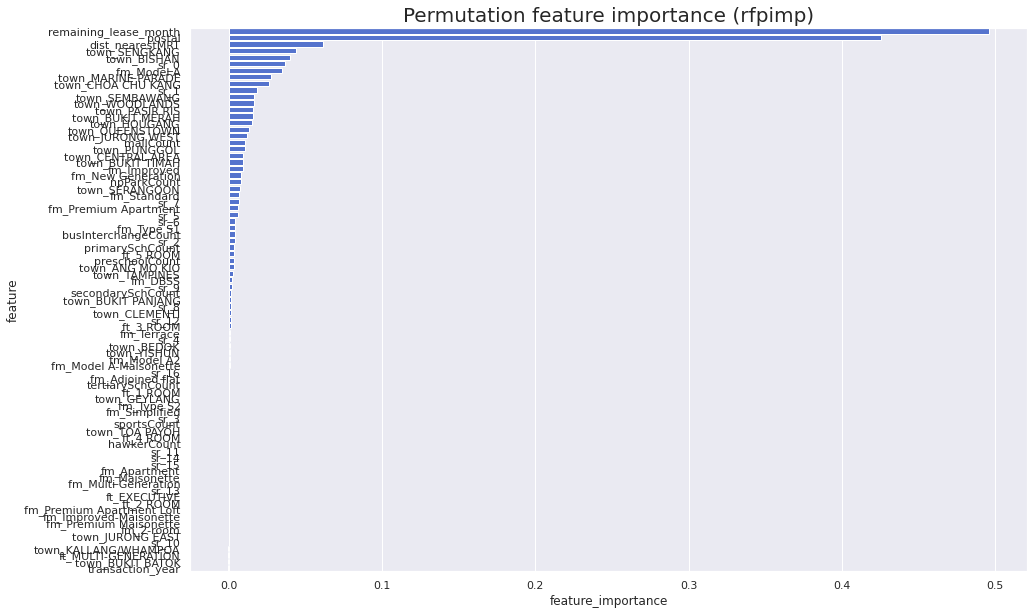

In [34]:
# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15, 10)})

# plotting a feature importance dataframe (horizontal barchart)

def var_imp_plot(imp_df, title):
    imp_df = imp_df.reset_index()
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue').set_title(title, fontsize = 20)

var_imp_plot(perm_imp_rfpimp, 'Permutation feature importance (rfpimp)')

In [35]:
perm_imp_rfpimp

,Importance
Feature,
remaining_lease_month,0.495872
postal,0.425511
dist_nearestMRT,0.061775
town_SENGKANG,0.043983
town_BISHAN,0.040388
...,...
sr_10,-0.000021
town_KALLANG/WHAMPOA,-0.000048
ft_MULTI-GENERATION,-0.000052


In [0]:
perm_imp_rfpimp.to_csv('/content/features.csv')